<a href="https://colab.research.google.com/github/Harsha-2005/Polynomial-Linear-Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported Successfully!")


Libraries imported Successfully!


In [8]:
mpg_df=sns.load_dataset('mpg')
print("The dataset is loaded Successfully")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
mpg_df.describe() #tells us the stastical summary of the dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
mpg_df.info() #gives us the concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
print(f"No of Rows: {mpg_df.shape[0]}")
print(f"No of Columns: {mpg_df.shape[1]}")


No of Rows: 398
No of Columns: 9


In [15]:
mpg_df=mpg_df.dropna() #drops all the duplicates present in the dataframe

In [16]:
X=mpg_df[['horsepower']]
y=mpg_df['mpg']

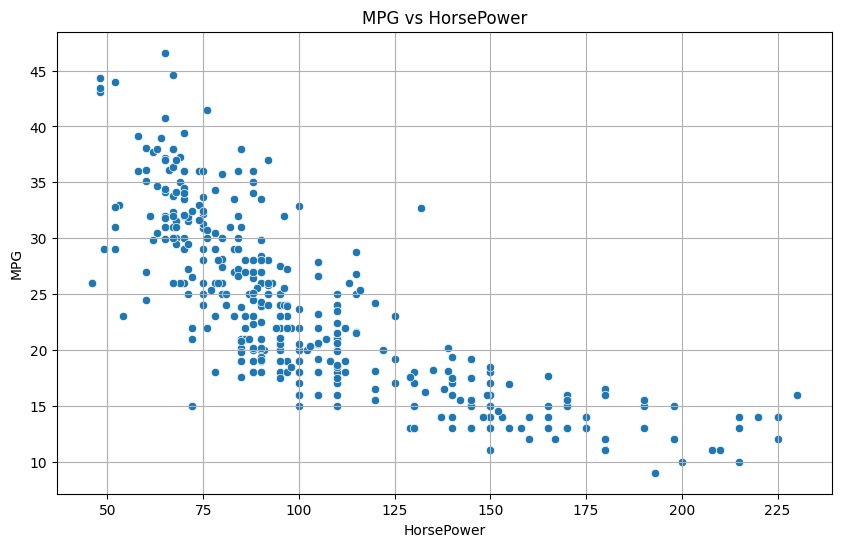

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='horsepower',y='mpg',data=mpg_df)
plt.title('MPG vs HorsePower')
plt.xlabel('HorsePower')
plt.ylabel('MPG')
plt.grid()
plt.show()

In [24]:
linear_model=LinearRegression()
linear_model.fit(X,y)
y_linear_pred=linear_model.predict(X)
r2_linear=r2_score(y,y_linear_pred)
mse_linear=mean_squared_error(y,y_linear_pred)
print(f"R2 Score: {r2_linear:.4f}")
print(f"MSE: {mse_linear:.4f}")



R2 Score: 0.6059
MSE: 23.9437


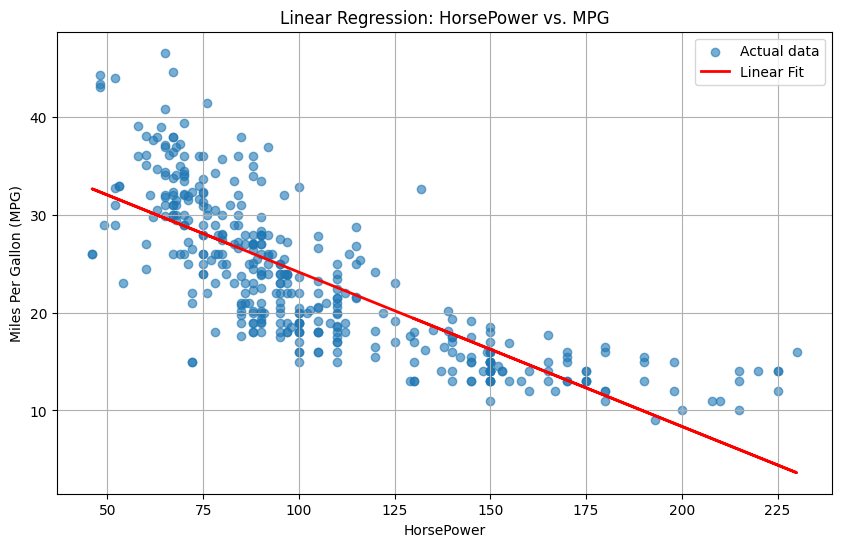

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.6,label='Actual data')
plt.plot(X,y_linear_pred,color='red',linewidth=2,label='Linear Fit')
plt.title("Linear Regression: HorsePower vs. MPG")
plt.xlabel('HorsePower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend()
plt.grid(True)
plt.show()


Polynomial Regression is used for fitting the curvilinear relation ships


In [29]:
degree=2
poly_features=PolynomialFeatures(degree=degree,include_bias=False)
X_poly=poly_features.fit_transform(X)
poly_model=LinearRegression()
poly_model.fit(X_poly,y)
y_poly_pred=poly_model.predict(X_poly)
r2_poly=r2_score(y,y_poly_pred)
mse_poly=mean_squared_error(y,y_poly_pred)
print(f"R2 Score: {r2_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")

R2 Score: 0.6876
MSE: 18.9848


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


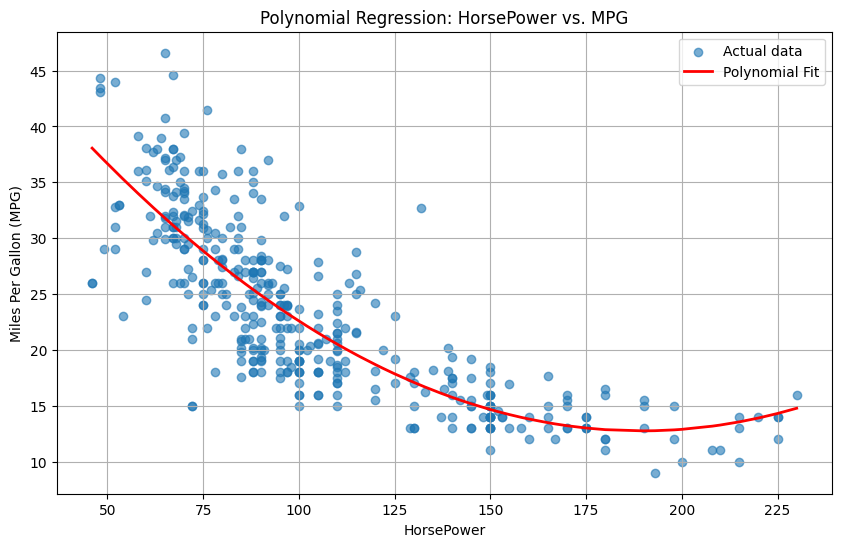

In [31]:
X_sorted=np.sort(X.values,axis=0)
X_poly_sorted=poly_features.transform(X_sorted)
y_poly_pred_sorted=poly_model.predict(X_poly_sorted)
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.6,label='Actual data')
plt.plot(X_sorted,y_poly_pred_sorted,color='red',linewidth=2,label='Polynomial Fit')
plt.title("Polynomial Regression: HorsePower vs. MPG")
plt.xlabel('HorsePower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend()
plt.grid(True)
plt.show()